In [93]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC


# Link Dataset: [Dataset](https://www.kaggle.com/datasets/ermila/klasifikasi-kemiskinan)

In [94]:
df = pd.read_csv("Kemiskinan.csv", delimiter= ';')
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,7148,66.41,5.71,0
1,ACEH,Aceh Singkil,20.36,8776,69.22,8.36,1
2,ACEH,Aceh Selatan,13.18,8180,67.44,6.46,0
3,ACEH,Aceh Tenggara,13.41,8030,69.44,6.43,0
4,ACEH,Aceh Timur,14.45,8577,67.83,7.13,0
...,...,...,...,...,...,...,...
509,PAPUA,Puncak,36.26,5412,43.17,0.94,1
510,PAPUA,Dogiyai,28.81,5415,55.00,5.68,1
511,PAPUA,Intan Jaya,41.66,5328,48.34,1.43,1
512,PAPUA,Deiyai,40.59,4673,49.96,0.79,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Provinsi                                                         514 non-null    object 
 1   Kab/Kota                                                         514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  514 non-null    float64
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)     514 non-null    int64  
 4   Indeks Pembangunan Manusia                                       514 non-null    float64
 5   Tingkat Pengangguran Terbuka                                     514 non-null    float64
 6   Klasifikasi Kemiskinan                                           514 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usa

In [96]:
df = df.rename(columns={'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'Persentase Penduduk Miskin', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran per Kapita Disesuaikan'})
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin,Pengeluaran per Kapita Disesuaikan,Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,7148,66.41,5.71,0
1,ACEH,Aceh Singkil,20.36,8776,69.22,8.36,1
2,ACEH,Aceh Selatan,13.18,8180,67.44,6.46,0
3,ACEH,Aceh Tenggara,13.41,8030,69.44,6.43,0
4,ACEH,Aceh Timur,14.45,8577,67.83,7.13,0
...,...,...,...,...,...,...,...
509,PAPUA,Puncak,36.26,5412,43.17,0.94,1
510,PAPUA,Dogiyai,28.81,5415,55.00,5.68,1
511,PAPUA,Intan Jaya,41.66,5328,48.34,1.43,1
512,PAPUA,Deiyai,40.59,4673,49.96,0.79,1


In [97]:
df.drop(columns=['Provinsi', 'Kab/Kota'], inplace=True)
df

,Persentase Penduduk Miskin,Pengeluaran per Kapita Disesuaikan,Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,18.98,7148,66.41,5.71,0
1,20.36,8776,69.22,8.36,1
2,13.18,8180,67.44,6.46,0
3,13.41,8030,69.44,6.43,0
4,14.45,8577,67.83,7.13,0
...,...,...,...,...,...
509,36.26,5412,43.17,0.94,1
510,28.81,5415,55.00,5.68,1
511,41.66,5328,48.34,1.43,1
512,40.59,4673,49.96,0.79,1


In [98]:
duplicate_rows_df = df[df.duplicated()]
print("jumlah Data Duplikat: ", duplicate_rows_df.shape)

jumlah Data Duplikat:  (0, 5)


<ipython-input-99-bc3371e098a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df,x = "Klasifikasi Kemiskinan", palette ='cubehelix')
<ipython-input-99-bc3371e098a1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)


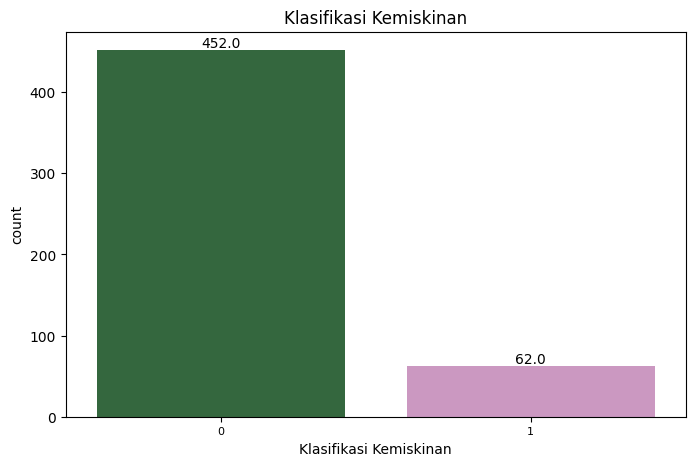

In [99]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df,x = "Klasifikasi Kemiskinan", palette ='cubehelix')
plt.title("Klasifikasi Kemiskinan")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Didapat bahwa jumlah kabupaten/kota pada suatu provinsi yang termasuk dalam kategori miskin berjumlah 62 dan tidak miskin berjumlah 452.

In [100]:
X = df.columns[:-1]
y = df.columns[-1]
scaler = StandardScaler()
df[X]=scaler.fit_transform(df[X])
df

,Persentase Penduduk Miskin,Pengeluaran per Kapita Disesuaikan,Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,0.900264,-1.170303,-0.541816,0.246927,0
1,1.085043,-0.570561,-0.108890,1.252848,1
2,0.123657,-0.790123,-0.383128,0.531622,0
3,0.154454,-0.845382,-0.074995,0.520234,0
4,0.293707,-0.643871,-0.323042,0.785949,0
...,...,...,...,...,...
509,3.214018,-1.809832,-4.122318,-1.563729,1
510,2.216480,-1.808727,-2.299713,0.235539,1
511,3.937066,-1.840777,-3.325795,-1.377729,1
512,3.793796,-2.082073,-3.076207,-1.620668,1


Melakukan normalisasi dataset kecuali pada kolom klasifikasi kemiskinan dengan memanfaatkan library sklearn

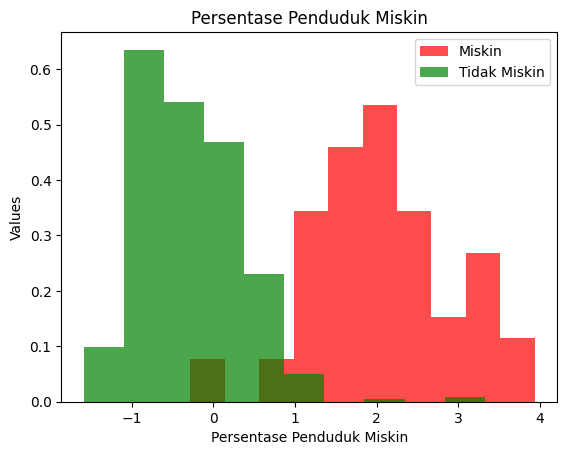

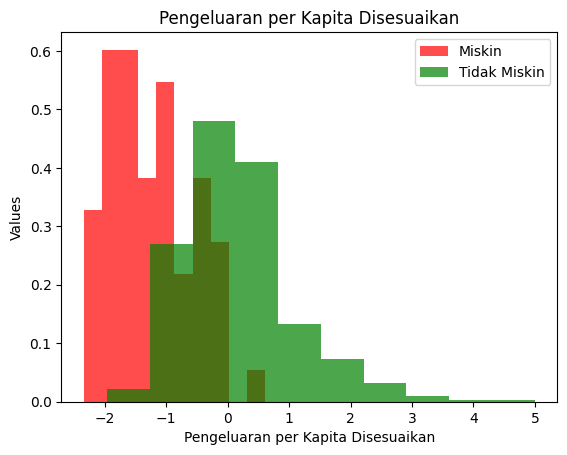

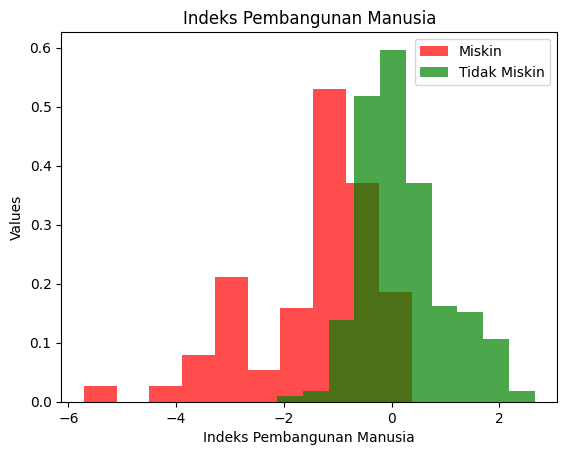

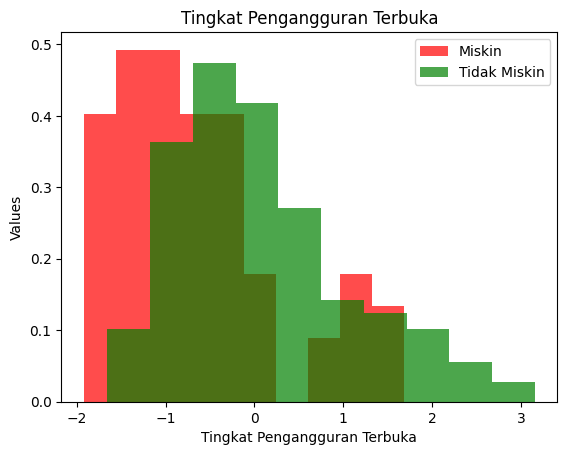

In [101]:
for col in df.columns[:-1]:
  plt.hist(df[df["Klasifikasi Kemiskinan"]==1][col], color = 'red', label = "Miskin", alpha = 0.7, density = True)
  plt.hist(df[df["Klasifikasi Kemiskinan"]==0][col], color = 'green', label = "Tidak Miskin", alpha = 0.7, density = True)
  plt.title(col)
  plt.ylabel("Values")
  plt.xlabel(col)
  plt.legend()
  plt.show()

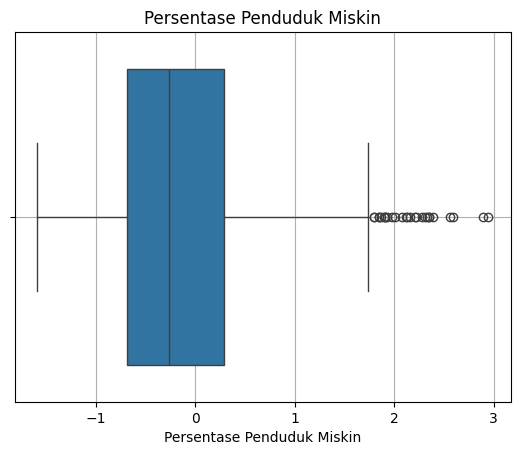

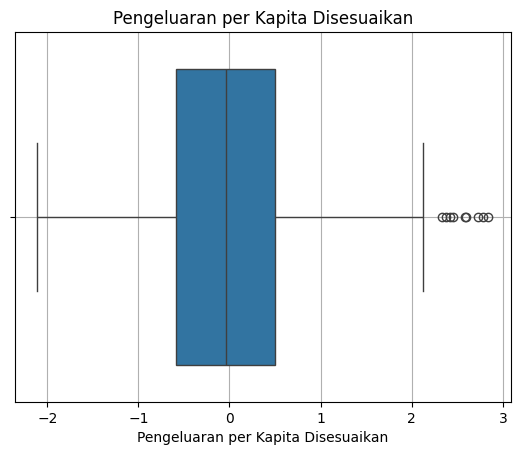

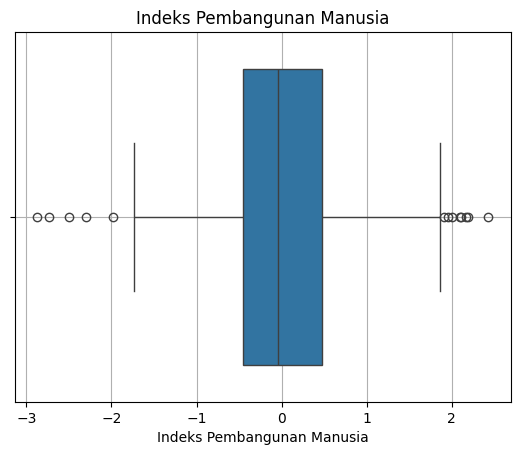

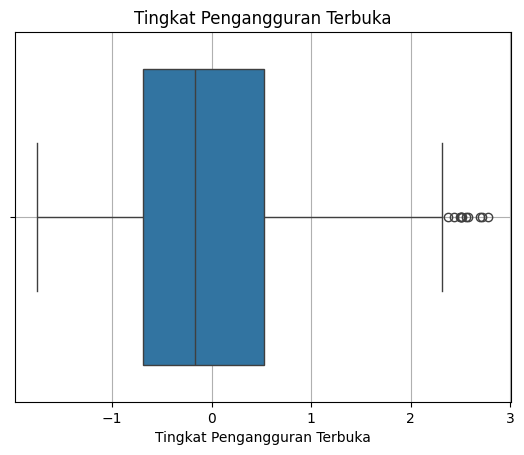

In [139]:
for col in df.columns[:-1]:
  sns.boxplot(x=df[col])
  plt.grid()
  plt.title(col)
  plt.show()

In [103]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.iloc[:, :-1])) < 3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 513
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Persentase Penduduk Miskin          491 non-null    float64
 1   Pengeluaran per Kapita Disesuaikan  491 non-null    float64
 2   Indeks Pembangunan Manusia          491 non-null    float64
 3   Tingkat Pengangguran Terbuka        491 non-null    float64
 4   Klasifikasi Kemiskinan              491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [104]:
# Q1 = df.iloc[:, :-1].quantile(0.25)
# Q3 = df.iloc[:, :-1].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)]

# df.info()

# Train and Test

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
features_train, features_test, target_train, target_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42, shuffle=True)

# K Nearest Neighbors

In [107]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train, target_train)

KNeighborsClassifier()

In [108]:
target_pred = knn_model.predict(features_test)

In [109]:
acc = classification_report(target_test, target_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.80      0.67      0.73         6

    accuracy                           0.97        99
   macro avg       0.89      0.83      0.86        99
weighted avg       0.97      0.97      0.97        99



In [110]:
# Prediksi pada data latih
target_pred_train = knn_model.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = knn_model.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
0.9846938775510204
Performa pada Data Uji:
0.9696969696969697


In [111]:
x_new = np.array([40.98,8,9.41,5.71])
y_pred = knn_model.predict([x_new])
print(y_pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Logistic Regresision

In [112]:
logis_model = LogisticRegression()
logis_model.fit(features_train, target_train)

LogisticRegression()

In [113]:
target_pred_logis = logis_model.predict(features_test)

In [114]:
logis_acc = classification_report(target_test, target_pred_logis)
print(logis_acc)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.67      0.67      0.67         6

    accuracy                           0.96        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.96      0.96      0.96        99



In [115]:
# Prediksi pada data latih
target_pred_train = logis_model.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = logis_model.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
0.9846938775510204
Performa pada Data Uji:
0.9595959595959596


In [116]:
x_new = np.array([58.98,7148,66.41,21.71])
y_pred = logis_model.predict([x_new])
print(y_pred)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Naive Bayes

In [117]:
model_GNB = GaussianNB()
model_GNB.fit(features_train, target_train)

GaussianNB()

In [118]:
target_pred_GNB = model_GNB.predict(features_test)

In [119]:
GNB_acc = classification_report(target_test, target_pred_GNB)
print(GNB_acc)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        93
           1       0.44      0.67      0.53         6

    accuracy                           0.93        99
   macro avg       0.71      0.81      0.75        99
weighted avg       0.95      0.93      0.94        99



In [120]:
# Prediksi pada data latih
target_pred_train = model_GNB.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = model_GNB.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
0.9693877551020408
Performa pada Data Uji:
0.9292929292929293


In [121]:
x_new = np.array([58.98,7148,66.41,5.71])
y_pred = model_GNB.predict([x_new])
print(y_pred)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Random Forest Classification

In [122]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(features_train, target_train)

RandomForestClassifier(random_state=0)

In [123]:
target_pred = RFC.predict(features_test)

In [124]:
RFC_acc = classification_report(target_test, target_pred)
print(RFC_acc)


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.71      0.83      0.77         6

    accuracy                           0.97        99
   macro avg       0.85      0.91      0.88        99
weighted avg       0.97      0.97      0.97        99



In [125]:
# Prediksi pada data latih
target_pred_train = RFC.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = RFC.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
1.0
Performa pada Data Uji:
0.9696969696969697


In [126]:
x_new = np.array([58.98,7148,66.41,5.71])
y_pred = RFC.predict([x_new])
print(y_pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [127]:
df_2 = pd.DataFrame({'Actual': target_test, 'Predicted': target_pred})
df_2

,Actual,Predicted
460,0,0
85,0,0
442,0,0
482,1,1
436,0,0
...,...,...
383,0,0
56,0,0
282,0,0
405,0,0


# XGBoost

In [128]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(features_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
y_pred= xgb_model.predict(features_test)

In [130]:
acc_xgb = classification_report(target_test, y_pred)
print(acc_xgb)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.71      0.83      0.77         6

    accuracy                           0.97        99
   macro avg       0.85      0.91      0.88        99
weighted avg       0.97      0.97      0.97        99



In [131]:
# Prediksi pada data latih
target_pred_train = xgb_model.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = xgb_model.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
0.9974489795918368
Performa pada Data Uji:
0.9696969696969697


In [132]:
x_new = np.array([10.98,7148,66.41,5.71])
y_pred = xgb_model.predict([x_new])
print(y_pred)

[1]


In [133]:
svm_model = SVC()
svm_model.fit(features_train, target_train)

SVC()

In [134]:
y_pred= svm_model.predict(features_test)

In [135]:
svm_acc = classification_report(target_test, y_pred)
print(svm_acc)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.67      0.67      0.67         6

    accuracy                           0.96        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.96      0.96      0.96        99



In [136]:
# Prediksi pada data latih
target_pred_train = svm_model.predict(features_train)

# Evaluasi pada data latih
acc_train = accuracy_score(target_train, target_pred_train)
print("Performa pada Data Latih:")
print(acc_train)

# Prediksi pada data uji
target_pred_test = svm_model.predict(features_test)

# Evaluasi pada data uji
acc_test = accuracy_score(target_test, target_pred_test)
print("Performa pada Data Uji:")
print(acc_test)

Performa pada Data Latih:
0.9846938775510204
Performa pada Data Uji:
0.9595959595959596


In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, y_pred)
print(cm)


[[91  2]
 [ 2  4]]


In [138]:
x_new = np.array([90.98,71,66.41,5.71])
y_pred = xgb_model.predict([x_new])
print(y_pred)

[1]
